In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
data1 = sio.loadmat('./data/ex7data2.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
X = data1['X']
X.shape

(300, 2)

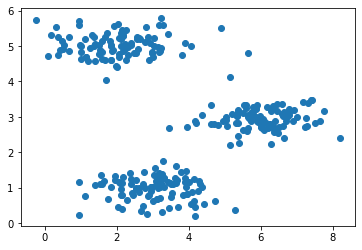

In [4]:
plt.scatter(X[:,0],X[:,1])
plt.show()

## 1. get center

In [5]:
def find_centroids(X,centros):
    
    idx = []
    
    for i in range(len(X)):
        # (2,) (k,2) -> (k,2)
        dist =np.linalg.norm((X[i] - centros),axis=1) #(k,)
        id_i = np.argmin(dist)
        idx.append(id_i)
        
    return np.array(idx)

In [6]:
centros = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_centroids(X,centros)

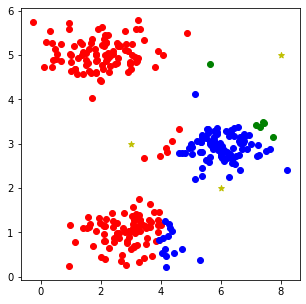

In [7]:
plt.figure(figsize=(5,5))
#plot the center of each cluster
plt.scatter(centros[0][0],centros[0][1],color='y',marker='*')
plt.scatter(centros[1][0],centros[1][1],color='y',marker='*')
plt.scatter(centros[2][0],centros[2][1],color='y',marker='*')

#plot the initial cluster
plt.scatter(X[idx==0][:,0],X[idx==0][:,1],color='r')
plt.scatter(X[idx==1][:,0],X[idx==1][:,1],color='b')
plt.scatter(X[idx==2][:,0],X[idx==2][:,1],color='g')
plt.show()

In [8]:
def compute_centros(X,idx,k):
    
    centros = []
    
    for i in range(k):
        centros_i = np.mean(X[idx == i],axis=0)
        centros.append(centros_i)
        
    return np.array(centros)

## 2. get the center of each cluster

In [9]:
compute_centros(X,idx,k=3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

## 3. repeat step1 & 2

In [10]:
def run_kmeans(X,centros,iters):
    
    
    k = len(centros)
    centros_all = []
    centros_all.append(centros)
    centros_i = centros
    for i in range(iters):
        idx = find_centroids(X,centros_i)
        centros_i = compute_centros(X,idx,k)
        centros_all.append(centros_i)
        
    return idx,np.array(centros_all)

## Visualization 

In [11]:
def plot_data(X,centros_all,idx):
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=idx,cmap='rainbow')
    plt.plot(centros_all[:,:,0],centros_all[:,:,1],'kx--')


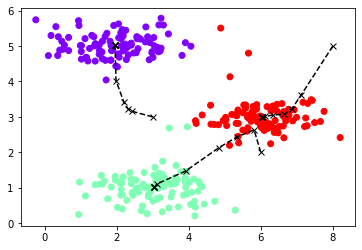

In [12]:
idx,centros_all = run_kmeans(X,centros,iters=10)
plot_data(X,centros_all,idx)

# The influence of difference initial center

In [13]:
def init_centros(X,k):
    index = np.random.choice(len(X),k)
    return X[index]

In [14]:
init_centros(X,k=3)

array([[2.45575934, 0.78904654],
       [1.16074178, 4.67727927],
       [0.47647355, 5.13535977]])

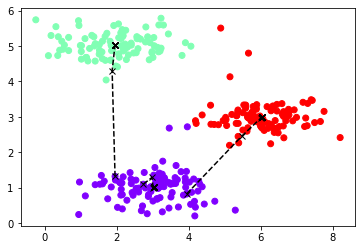

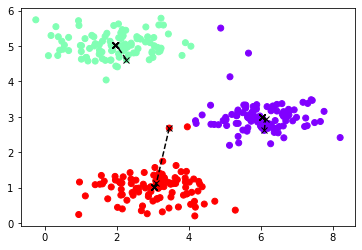

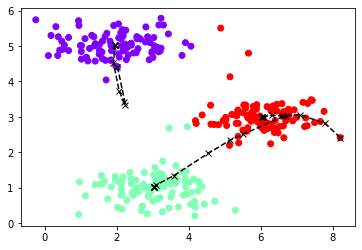

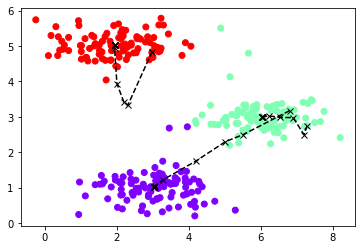

In [15]:
for i in range(4):
    idx,centros_all = run_kmeans(X,init_centros(X,k=3),iters=10)
    plot_data(X,centros_all,idx)

# Task 2

In [16]:
data = sio.loadmat('data/bird_small.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A'])

In [17]:
A = data['A']
A.shape

(128, 128, 3)

In [18]:
from skimage import io

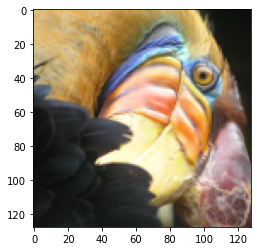

In [19]:
image = io.imread('data/bird_small.png')
plt.imshow(image)

In [20]:
A = A / 255
A = A.reshape(-1,3)

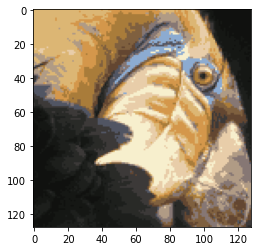

In [21]:
k = 16
idx,centros_all = run_kmeans(A,init_centros(A,k=16),iters=20)
centros = centros_all[-1]
im = np.zeros(A.shape)
for i in range(k):
    im[idx==i] = centros[i]
im = im.reshape(128,128,3)
plt.imshow(im)